In [16]:

# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings

warnings.filterwarnings('ignore')

In [17]:
har_df = pd.read_csv('signals.csv')


In [18]:
def transformation(df_train):
    x_list = []
    y_list = []
    z_list = []
    train_labels = []

    users = df_train['user_snippet'].unique()

    # creating overlaping windows of size window-size 100
    for i in range(0, len(users)):
        s_train = df_train[df_train['user_snippet'] == users[i]]
        xs = s_train['x-axis'].values
        ys = s_train['y-axis'].values
        zs = s_train['z-axis'].values
        #label = stats.mode(df_train['activity'][i: i + 100])[0][0]

        x_list.append(xs)
        y_list.append(ys)
        z_list.append(zs)
        #train_labels.append(label)

    # Statistical Features on raw x, y and z in time domain
    X_train = pd.DataFrame()

    # mean
    X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
    X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
    X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

    # std dev
    X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
    X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
    X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

    # avg absolute diff
    X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

    # min
    X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
    X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
    X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

    # max
    X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
    X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
    X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

    # max-min diff
    X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
    X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
    X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

    # median
    X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
    X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
    X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

    # median abs dev 
    X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

    # interquartile range
    X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

    # negtive count
    X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
    X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
    X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

    # positive count
    X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
    X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
    X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))
    # values above mean
    X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
    X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
    X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

    # number of peaks
    X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
    X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
    X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

    # skewness
    X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
    X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
    X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

    # kurtosis
    X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
    X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
    X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

    # energy
    X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
    X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
    X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

    # avg resultant
    X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

    # signal magnitude area
    X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                    + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))
    x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

    # Statistical Features on raw x, y and z in frequency domain
    # FFT mean
    X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
    X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
    X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

    # FFT std dev
    X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
    X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
    X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

    # FFT avg absolute diff
    X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

    # FFT min
    X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
    X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
    X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

    # FFT max
    X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
    X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
    X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

    # FFT max-min diff
    X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
    X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
    X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

    # FFT median
    X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
    X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
    X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

    # FFT median abs dev 
    X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

    # FFT Interquartile range
    X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

    # FFT values above mean
    X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
    X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
    X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

    # FFT number of peaks
    X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
    X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
    X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

    # FFT skewness
    X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
    X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
    X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

    # FFT kurtosis
    X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
    X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
    X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

    # FFT energy
    X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/50)
    X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/50)
    X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/50))

    # FFT avg resultant
    X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

    # FFT Signal magnitude area
    X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                        + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/50))
    X_train['x_argmax'] = pd.Series(x_list).apply(lambda x: np.argmax(x))
    X_train['y_argmax'] = pd.Series(y_list).apply(lambda x: np.argmax(x))
    X_train['z_argmax'] = pd.Series(z_list).apply(lambda x: np.argmax(x))

    # index of min value in time domain
    X_train['x_argmin'] = pd.Series(x_list).apply(lambda x: np.argmin(x))
    X_train['y_argmin'] = pd.Series(y_list).apply(lambda x: np.argmin(x))
    X_train['z_argmin'] = pd.Series(z_list).apply(lambda x: np.argmin(x))

    # absolute difference between above indices
    X_train['x_arg_diff'] = abs(X_train['x_argmax'] - X_train['x_argmin'])
    X_train['y_arg_diff'] = abs(X_train['y_argmax'] - X_train['y_argmin'])
    X_train['z_arg_diff'] = abs(X_train['z_argmax'] - X_train['z_argmin'])

    # index of max value in frequency domain
    X_train['x_argmax_fft'] = pd.Series(x_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
    X_train['y_argmax_fft'] = pd.Series(y_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
    X_train['z_argmax_fft'] = pd.Series(z_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))

    # index of min value in frequency domain
    X_train['x_argmin_fft'] = pd.Series(x_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
    X_train['y_argmin_fft'] = pd.Series(y_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
    X_train['z_argmin_fft'] = pd.Series(z_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))

    # absolute difference between above indices
    X_train['x_arg_diff_fft'] = abs(X_train['x_argmax_fft'] - X_train['x_argmin_fft'])
    X_train['y_arg_diff_fft'] = abs(X_train['y_argmax_fft'] - X_train['y_argmin_fft'])
    X_train['z_arg_diff_fft'] = abs(X_train['z_argmax_fft'] - X_train['z_argmin_fft'])

    return X_train

In [19]:
x_train = pd.read_csv('transformed_features.csv')
x_train.head(4)

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,z_arg_diff,x_argmax_fft,y_argmax_fft,z_argmax_fft,x_argmin_fft,y_argmin_fft,z_argmin_fft,x_arg_diff_fft,y_arg_diff_fft,z_arg_diff_fft
0,-2.0800,7.8946,2.4245,4.702672,5.492643,3.994139,3.670600,4.286524,3.116930,-15.98,...,6,0,0,0,23,9,18,23,9,18
1,0.2904,8.1286,2.5945,2.650530,4.761512,3.144090,2.054776,2.998220,2.401060,-8.77,...,9,24,0,0,2,18,24,22,18,24
2,-1.6029,9.2503,0.2158,5.706680,4.767907,4.570115,4.343390,3.967312,3.825496,-17.58,...,36,9,9,1,34,14,15,25,5,14
3,-1.3832,9.0266,2.6332,4.058896,8.290627,5.770800,3.090408,7.183868,4.951512,-12.68,...,52,7,0,7,13,24,24,6,24,17


In [20]:
from sklearn import preprocessing

meta = pd.read_csv('metadata.csv')
df = pd.merge(meta, x_train, left_index=True, right_index=True)

df = df.dropna()
y = df['activity']
x_trains = df.drop(columns='activity',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_trains,y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((6503, 143), (1626, 143))

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# SVM model
SvmModel=svm.SVC()
X_train_data_lr.shape, X_test_data_lr.shape

((6503, 143), (1626, 143))

In [22]:
parameters=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100]}, {'kernel': ['linear'], 'C': [1, 10, 100]}]
model=GridSearchCV(SvmModel,parameters,n_jobs=-1,cv=4,verbose=4)
model.fit(X_train_data_lr,y_train)
#svm = SVC(C=100, kernel='rbf', gamma=1)
#svm.fit(X_train_data_lr, y_train)
#y_pred = SvmModel.predict(X_test_data_lr)
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\n -------------Classification Report-------------\n")
#print(classification_report(y_test, y_pred))

# View the accuracy score
print('Best score for training data:', model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',model.best_estimator_.C,"\n") 
print('Best Kernel:',model.best_estimator_.kernel,"\n")
print('Best Gamma:',model.best_estimator_.gamma,"\n")

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best score for training data: 0.9351071056864415 

Best C: 100 

Best Kernel: rbf 

Best Gamma: 0.001 



Accuracy: 0.9428044280442804
Best Parameters:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

 -------------Classification Report-------------

              precision    recall  f1-score   support

  Downstairs       0.79      0.78      0.78       128
     Jogging       0.98      0.99      0.98       523
     Sitting       0.96      0.98      0.97       100
    Standing       0.99      0.97      0.98        74
    Upstairs       0.77      0.75      0.76       141
     Walking       0.97      0.97      0.97       660

    accuracy                           0.94      1626
   macro avg       0.91      0.91      0.91      1626
weighted avg       0.94      0.94      0.94      1626



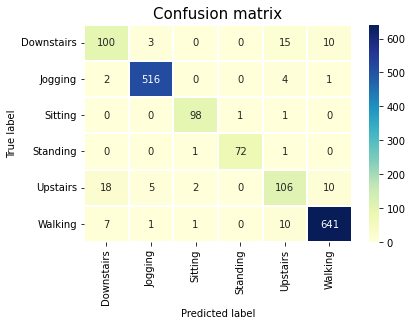

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_data_lr)
print("Accuracy:", accuracy_score(y_test, y_pred))

print('Best Parameters: ',model.best_params_)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))
final_model = model.best_estimator_

Y_predBest = final_model.predict(X_test_data_lr)
# Making the Confusion Matrix
labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
confusion_matrix = confusion_matrix(y_test, Y_predBest)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [36]:
solu = pd.read_csv('signals_test.csv')
solu_test = transformation(solu)


In [32]:
metaT = pd.read_csv('metadata_test.csv')
dfT = pd.merge(metaT, solu_test, left_index=True, right_index=True)
dfT.shape


(2621, 143)

In [39]:
scaler.fit(dfT)
solu_x_test = scaler.transform(dfT)
prediction = final_model.predict(solu_x_test)
submit = pd.read_csv('predictions_sample.csv')
submit['prediction'] = prediction
submit.to_csv('submitSVMMERGED.csv',index=False)